# 16 Clustering

1. Partitioning based Methods - KMeans
2. Hierarchical Clustering Methods - Agglomerative Clustering

K-Means Algorithm

Step 1: It randomly selects 'k' data objects from the dataset each of which represents a cluster center

Step 2: Repeat
                For each of the remaining data items, an item is assigned to a Cluster to which it is most similar

                It then computes a new mean for each cluster
        
        Until no change
                
         


In [1]:
#1 IMPORTING THE DATASET
import pandas as pd
customers_df = pd.read_csv("Salary_data.csv")
customers_df.head(5)

,age,income
0,25,69343
1,60,89000
2,28,66205
3,37,47900
4,30,57731


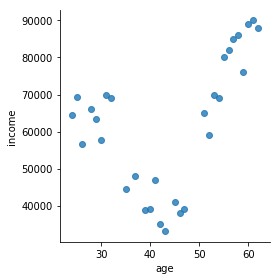

In [2]:
#2 IMPORTING THE LIBRARIES
import numpy as n
import seaborn as sn
import matplotlib as plt
%matplotlib inline

#Scatter Plot of the Data
sn.lmplot("age","income",data =customers_df, fit_reg = False, size =4 )

In [3]:
#3 IMPORTING KMEANS
from sklearn.cluster import KMeans #AgglomerativeClustering
clusters = KMeans(3)
clusters.fit(customers_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
#4 THE OUTPUT VARIABLE IS clusters.labels_
customers_df["clusterid"] = clusters.labels_

In [5]:
customers_df[0:5]

,age,income,clusterid
0,25,69343,2
1,60,89000,0
2,28,66205,2
3,37,47900,1
4,30,57731,2


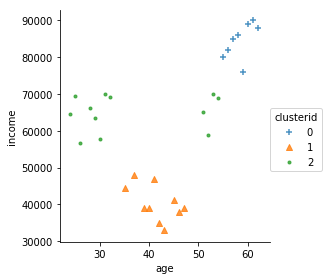

In [8]:
#5 PLOTTING THE CLUSTERS
markers = ['+','^','.']
sn.lmplot("age","income", data = customers_df, hue = "clusterid",markers = markers, fit_reg = False, size = 4)

In [6]:
#6 SCALING THE FEATURES
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(customers_df[["age", "income"]])
scaled_customers_df[0:5]

array([[-1.58294052,  0.41411441],
       [ 1.34326995,  1.51960053],
       [-1.33212248,  0.23763705],
       [-0.57966836, -0.7918142 ],
       [-1.16491046, -0.23893055]])

In [7]:
#7 CLUSTERING AGAIN
clusters_new = KMeans(3)
clusters_new.fit(scaled_customers_df)
customers_df["clusterid_new"] = clusters_new.labels_

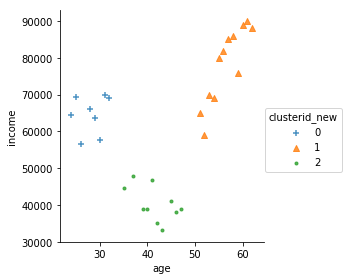

In [9]:
#5 PLOTTING AGAIN
markers = ['+','^','.']
sn.lmplot("age","income", data = customers_df, hue = "clusterid_new",markers = markers, fit_reg = False, size = 4)

In [10]:
#PROBLEM STATEMENT: USE bev.csv - Apply Clustering (KMeans and Agglomerative) - Compare the clusters created by both the techniques

In [11]:
#1 IMPORTING THE DATA
import pandas as pd
bev_df = pd.read_csv("bev.csv")
bev_df.head(5)

,Name,Potassium,Sodium,Caffeine,Cost
0,new_england_coffee,144,15,4.7,0.43
1,post_alley_blend,151,19,4.9,0.43
2,stumpdown_coffee,157,15,0.9,0.48
3,bizzy_organic_coffee,170,7,5.2,0.73
4,indian_bean,152,11,5.0,0.77


In [12]:
#2 IMPORT THE LIBRARIES (already done)
#3 SCALE THE FEATURES
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_bev_df = scaler.fit_transform(bev_df[["Potassium", "Sodium","Caffeine","Cost"]])
scaled_bev_df[0:5]

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478]])

In [14]:
#4 KMEANS CLUSTERING
clusters = KMeans(3)
clusters.fit(scaled_bev_df)
bev_df["clusterid"] = clusters.labels_

In [17]:
#5 CLUSTERWISE DATA
bev_df[bev_df.clusterid == 2]

,Name,Potassium,Sodium,Caffeine,Cost,clusterid
3,bizzy_organic_coffee,170,7,5.2,0.73,2
4,indian_bean,152,11,5.0,0.77,2
13,green_mountain_coffee,150,19,4.7,0.76,2
14,koffee_cuit,149,6,5.0,0.79,2
